# CodSoft

## Task 2: SALES PREDICTION USING PYTHON
### Objective:-
Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.      
**Dataset:-** https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction

## Loading necessay Libraries and Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
import torch
import torch.nn as nn
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('/Users/asaifali/Desktop/Internships/Codsoft/car_purchasing.csv',encoding='ISO-8859-1')
data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


## Data Preprocessing

In [3]:
data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [4]:
data.drop(["customer name"], axis=1, inplace=True)
data.drop(['customer e-mail'], axis=1, inplace=True)
data.drop(['country'], axis=1, inplace=True)
data.drop(['gender'], axis=1, inplace=True)

In [5]:
data

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [7]:
# Preprocess your data, select relevant features, and the target variable (movie rating)
X = data[['age', 'annual Salary','credit card debt','net worth']]  # Features
y = data['car purchase amount']  # Target variable

In [8]:
# Splitting of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Visualisation

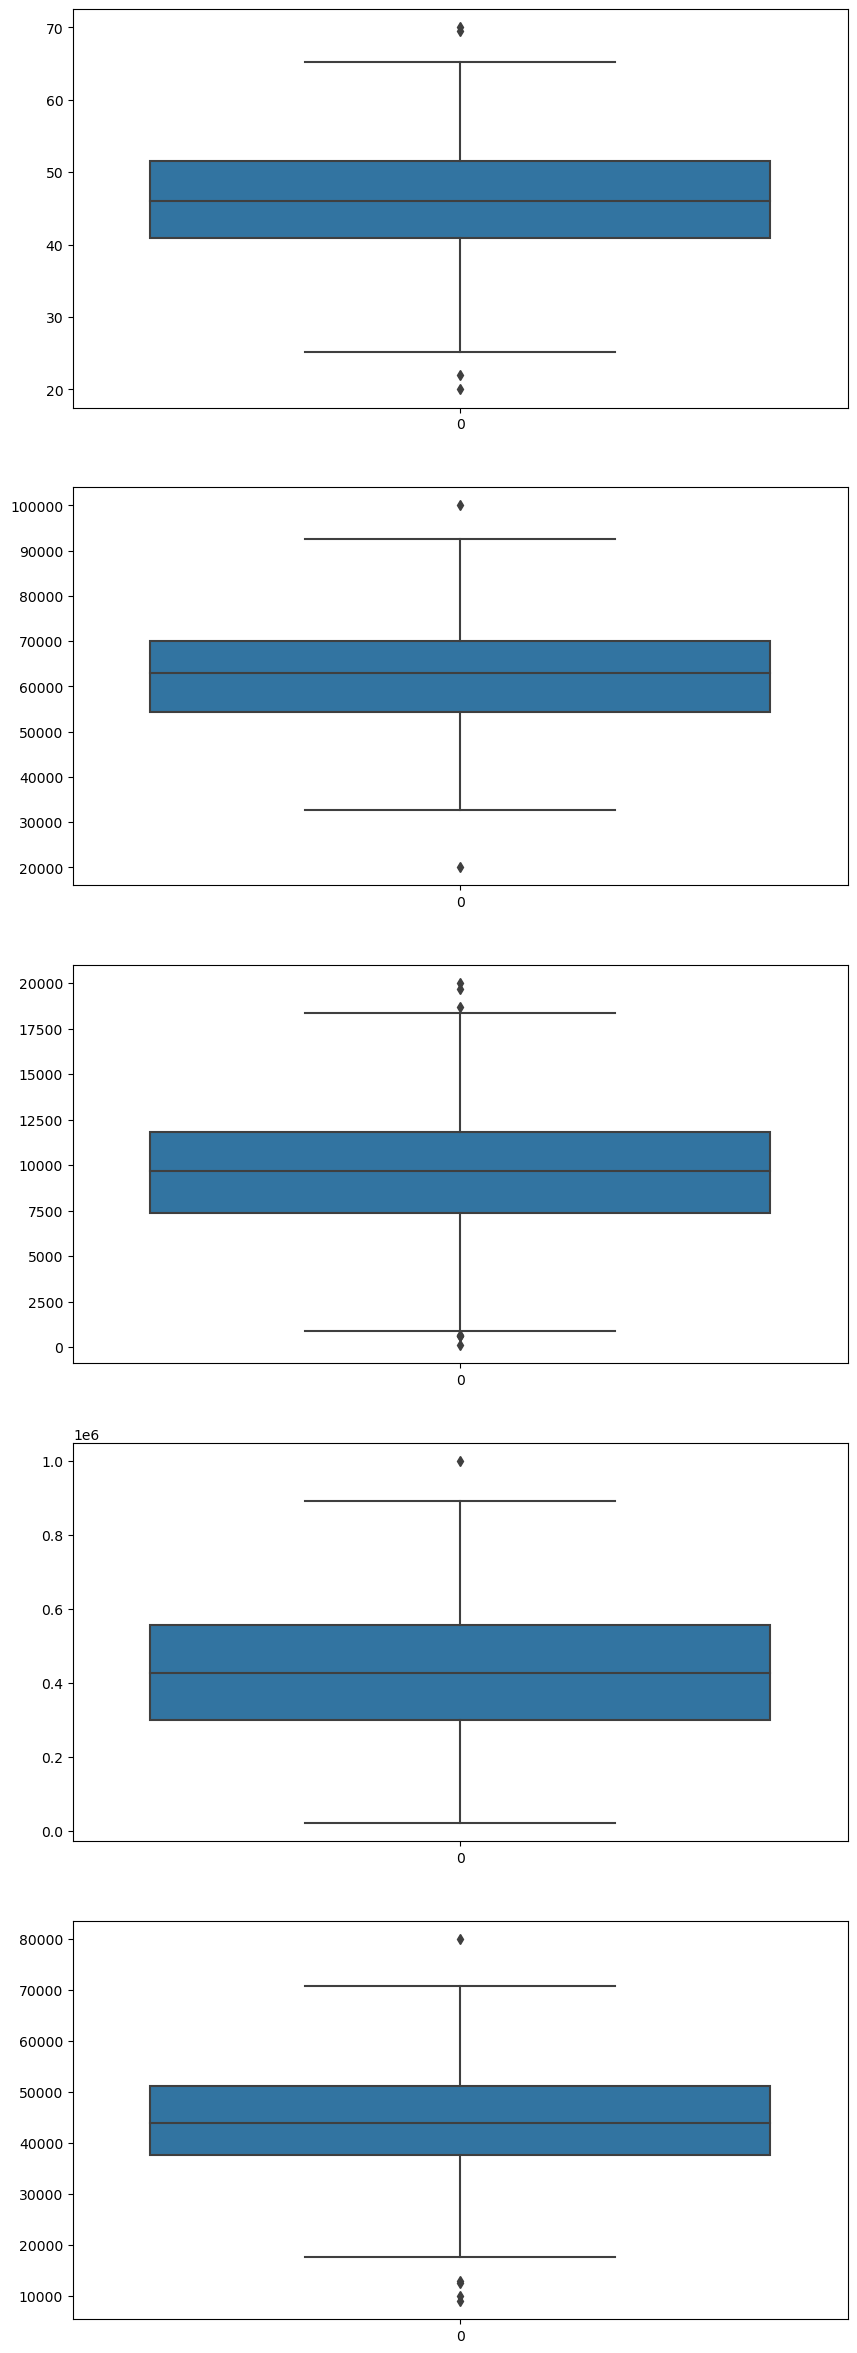

In [9]:
fig, axs = plt.subplots(5, figsize = (10,30))
plt1 = sns.boxplot(data['age'], ax = axs[0])
plt2 = sns.boxplot(data['annual Salary'], ax = axs[1])
plt3 = sns.boxplot(data['credit card debt'], ax = axs[2])
plt4 = sns.boxplot(data['net worth'], ax = axs[3])
plt5 = sns.boxplot(data['car purchase amount'], ax = axs[4])
plt.show()

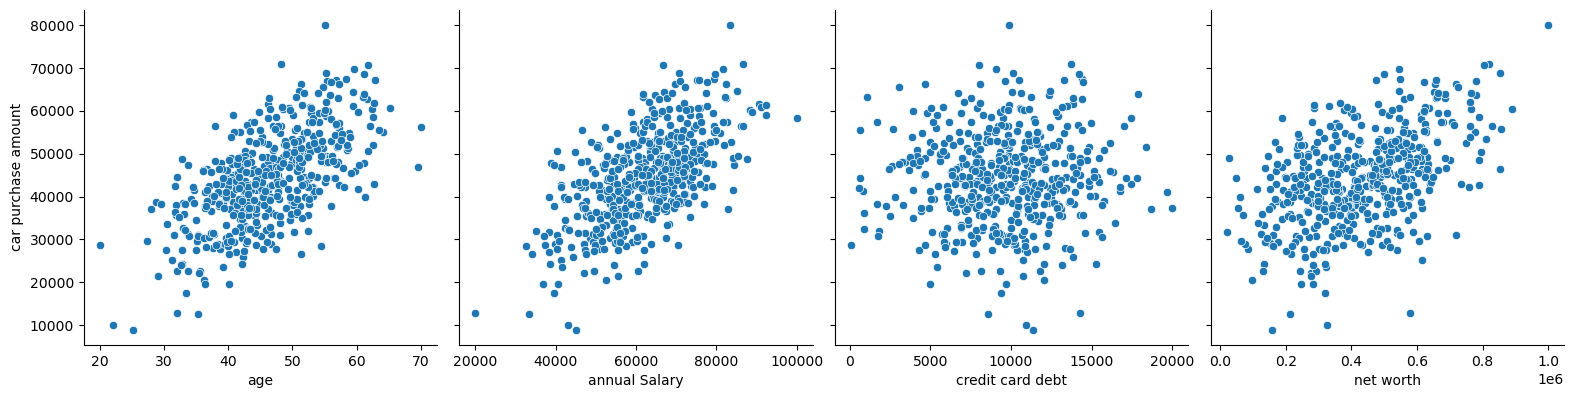

In [10]:
sns.pairplot(data, x_vars=['age', 'annual Salary','credit card debt','net worth'], y_vars='car purchase amount', height=4, aspect=1, kind='scatter')
plt.show()

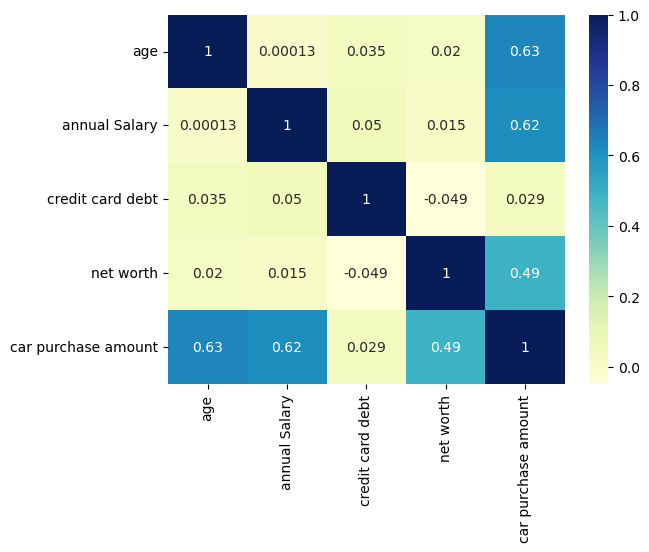

In [11]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

### **feature importance graph:** A feature importance graph displays the relative significance of different features in predicting the target variable. It aids in identifying the most influential features for the model's predictions, facilitating effective feature selection and enhancing understanding of the underlying data patterns.

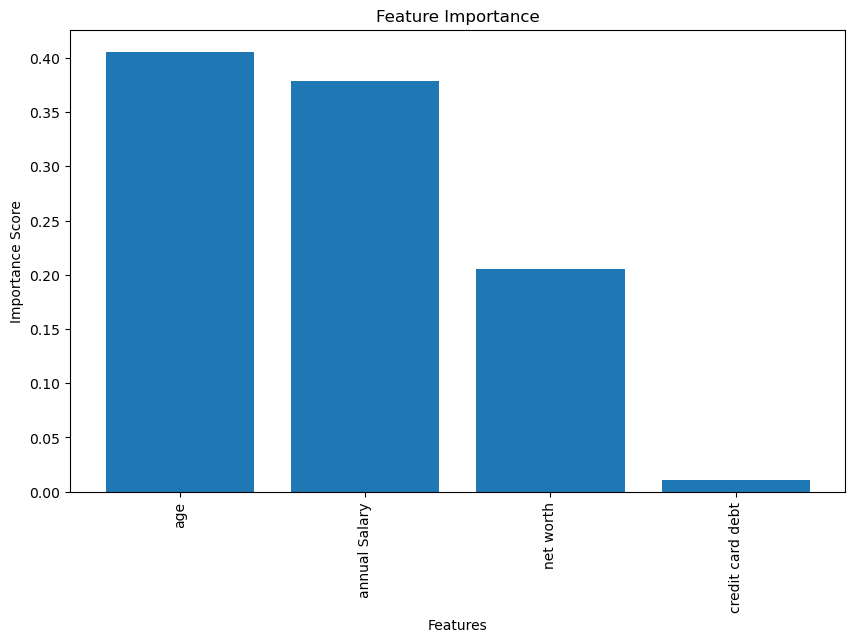

In [12]:
# Load the features   
feature_names = data.columns

# Train a RandomForestRegressor 
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


## Comparision of Models:

### **Decision Tree Regression:** Constructs a decision tree to model the data and predict outcomes based on a sequence of binary decisions.

In [13]:
# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor()
# Fit the regressor on the training data
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [14]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )


Root Mean Squared Error: 3556.696435548412
R2 Score= 0.882840424495169


### **Random Forest Regression:** Averages predictions from multiple decision trees to enhance accuracy and decrease overfitting.

In [15]:
# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # or RandomForestClassifier

# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
# Make predictions on the test data
predictions = model.predict(X_test)


# Calculate the mean squared error
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, predictions)))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 2256.012056832566
R2 Score= 0.882840424495169


### **Support Vector Regression (SVR):** Utilizes support vector machines to perform regression tasks, enabling the handling of complex decision boundaries and non-linear data.

In [17]:
# Initialize the Support Vector Regressor
regressor = SVR(kernel='linear')

# Fit the regressor on the training data
regressor.fit(X_train, y_train)


SVR(kernel='linear')

In [18]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Mean Squared Error: 11171.654956050874
R2 Score= -0.15589721573546456


### **Linear Regression:** A fundamental model that assumes a linear relationship between the input features and the target variable.

In [19]:
# Create a linear regression model and fit it on the training data
model = LinearRegression()

# Fit the regressor on the training data
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 1.4386814760274969
R2 Score= 0.9999999808303804


### **CatBoost Regressor:** An implementation of gradient boosting that is optimized for categorical features and provides high accuracy and fast training.

In [21]:
# Create a Catboost regression model and fit it on the training data
model = CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, loss_function='RMSE')

# Fit the regressor on the training data
model.fit(X_train, y_train, verbose=False)

In [22]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 1056.8676182582733
R2 Score= 0.9896551219993506


### **AdaBoost Regressor:** A boosting algorithm that combines multiple weak learners to create a strong predictive model, giving more weight to misclassified data points.

In [23]:
# Create a Adaboost regression model and fit it on the training data
model = AdaBoostRegressor(n_estimators=100, random_state=42)
# Fit the regressor on the training data
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [24]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 3316.9717490983826
R2 Score= 0.8981015130632366


### **XGBoost Regressor:** An optimized gradient boosting library that is highly efficient and scalable, providing high prediction accuracy and handling complex datasets effectively.

In [25]:
# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the XGBoost regressor
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

# Train the XGBoost regressor
model = xgb.train(params, dtrain, num_boost_round=100)

In [26]:
# Make predictions on the test data
y_pred = model.predict(dtest)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 1587.9553561750795
R2 Score= 0.9766460273595607


### **Ridge Regression:** A regression technique that incorporates L2 regularization to prevent overfitting by penalizing large coefficient values.

In [27]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the model on the training data
ridge_model.fit(X_train, y_train)


Ridge()

In [28]:
# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 1.471919055759411
R2 Score= 0.9999999799344048


### **Lasso Regression:** Similar to Ridge Regression, it utilizes L1 regularization, encouraging sparsity in the coefficient values and performing feature selection.

In [29]:
# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

Lasso()

In [30]:
# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 1.4488912841635664
R2 Score= 0.9999999805573352


### **Gradient Boosting Regression:** Builds an ensemble of weak learners, typically decision trees, in a sequential manner to create a powerful predictive model.

In [31]:
# Initialize the Gradient Boosting Regression model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [32]:
# Make predictions on the test data
y_pred = gbr_model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 1545.474040082411
R2 Score= 0.9778788541586922


### **Polynomial Regression:** Extends linear regression by incorporating polynomial terms, allowing for the capture of non-linear relationships between variables.

In [33]:
# Transform the data to include another axis
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

In [34]:
# Make predictions
y_pred = poly_model.predict(X_poly)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 152.17897877654227
R2 Score= 0.9998000639727616


### **Elastic Net Regression:** A hybrid of Ridge and Lasso Regression, combining L1 and L2 regularization to balance their properties.

In [35]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize the Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters as needed

# Fit the model on the training data
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [36]:
# Make predictions on the test data
y_pred = elastic_net_model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 25.29092250926414
R2 Score= 0.9999940760207051


### **Neural Network Regression:** Utilizes deep learning techniques to capture complex relationships in the data, facilitating the analysis of intricate patterns.

In [37]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.values.astype(np.float32))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Create a custom neural network class
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


In [39]:
# Initialize the model
input_size = X.shape[1]
model = NeuralNet(input_size)

In [40]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [41]:
# Train the model
num_epochs = 50000
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([400])) that is different to the input size (torch.Size([400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/50000], Loss: 2048655104.0000
Epoch [20/50000], Loss: 2048604416.0000
Epoch [30/50000], Loss: 2048528512.0000


Epoch [40/50000], Loss: 2048418560.0000
Epoch [50/50000], Loss: 2048266368.0000
Epoch [60/50000], Loss: 2048060160.0000
Epoch [70/50000], Loss: 2047787520.0000
Epoch [80/50000], Loss: 2047435648.0000
Epoch [90/50000], Loss: 2046990464.0000
Epoch [100/50000], Loss: 2046437376.0000
Epoch [110/50000], Loss: 2045761024.0000
Epoch [120/50000], Loss: 2044946304.0000
Epoch [130/50000], Loss: 2043976576.0000
Epoch [140/50000], Loss: 2042836224.0000
Epoch [150/50000], Loss: 2041508096.0000
Epoch [160/50000], Loss: 2039975680.0000
Epoch [170/50000], Loss: 2038220800.0000
Epoch [180/50000], Loss: 2036222848.0000
Epoch [190/50000], Loss: 2033964416.0000
Epoch [200/50000], Loss: 2031429376.0000
Epoch [210/50000], Loss: 2028600704.0000
Epoch [220/50000], Loss: 2025464064.0000
Epoch [230/50000], Loss: 2022003072.0000
Epoch [240/50000], Loss: 2018203264.0000
Epoch [250/50000], Loss: 2014048768.0000
Epoch [260/50000], Loss: 2009526272.0000
Epoch [270/50000], Loss: 2004621440.0000
Epoch [280/50000], Los

In [42]:
# Make predictions on the test data
with torch.no_grad():
    y_pred = model(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 10473.628
R2 Score= -0.01596438444551418


### **Conclusion:-** Based on R2 Score and RMSE , We can see that Linear Regression model is the best model and Support Vector Regression (SVR) is the worst model.